<a href="https://colab.research.google.com/github/LK920/tesorflow/blob/master/tf07_cifar10_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 20/08/19
이름 : 강래구
내용 : 딥러닝 cifar10 이미지(rgb) 분류 실습하기
"""
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from PIL import Image #파이썬 이미지 처리 라이브러리

In [ ]:
#학습데이터 로드
(cifar_train_data, cifar_train_label),(cifar_test_data, cifar_test_label) = load_data()

#데이터 형태선언
print(cifar_train_data.shape, cifar_train_label.shape)
print(cifar_test_data.shape, cifar_test_label.shape)
print(cifar_train_label)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


[46619 20823 14728 45807  1356 16964 28164 12890  3646]


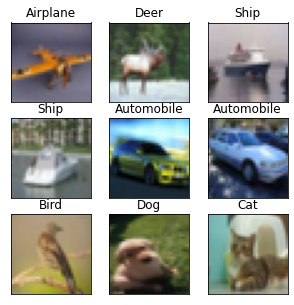

In [ ]:
#데이터 샘플 이미지 출력
class_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
random_idx = np.random.randint(50000, size=9)
print(random_idx)

plt.figure(figsize=(5,5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])#x축 y축 기호 제거
  plt.yticks([])
  label = cifar_train_label[idx][0]
  plt.imshow(cifar_train_data[idx, :])
  plt.title('%s' %class_names[label])

In [ ]:
#데이터셋 분할하기
train_data, test_data, train_label, test_label = train_test_split(cifar_train_data, cifar_train_label)
print('훈련데이터, ', train_data.shape)
print('검증데이터, ', test_data.shape)

훈련데이터,  (37500, 32, 32, 3)
검증데이터,  (12500, 32, 32, 3)


In [ ]:
# 모델 학습을 위한 데이터 전처리(정규화) - 3채널 이미지(RGB)

#방법1 : 픽셀 데이터를 0~1 사이로 초기화하는 정규화 > 정확도 낮음
#train_data = train_data / 255 #훈련할때
#test_data = test_data / 255 #검증할때
#mnist_test_data = mnist_test_data / 255 #최종적으로 predict할때사용

#방법2 : 픽셀 데이터를 평균과 표준편차를 이용한 정규화 > 정확도 높음
#train_data의 평균과 표준편차
mean = np.mean(train_data, axis=(0,1,2))
std = np.std(train_data, axis=(0,1,2))

train_data = (train_data - mean) / std 
test_data = (test_data - mean) / std
cifar_test_data = (cifar_test_data - mean) / std 

In [ ]:
#각 데이터의 레이블을 범주형 형태로 변환
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)
cifar_test_label = to_categorical(cifar_test_label)

In [ ]:
#학습모델 구성하기 
model = Sequential()
model.add(Flatten(input_shape=(32,32,3))) #입력층
model.add(Dense(64, activation='relu')) #은닉층
model.add(Dense(32, activation='relu')) #은닉층
model.add(Dense(10, activation='softmax')) #출력층

In [ ]:
#학습모델 설정하기
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#학습하기
model.fit(train_data, train_label, epochs=30, batch_size=128, validation_data=(test_data, test_label))

Epoch 1/30
293/293 [==============================] - 2s 5ms/step - loss: 0.8619 - acc: 0.6945 - val_loss: 1.8205 - val_acc: 0.4708
Epoch 2/30
293/293 [==============================] - 1s 5ms/step - loss: 0.8485 - acc: 0.6985 - val_loss: 1.8432 - val_acc: 0.4614
Epoch 3/30
293/293 [==============================] - 1s 5ms/step - loss: 0.8331 - acc: 0.7051 - val_loss: 1.8475 - val_acc: 0.4693
Epoch 4/30
293/293 [==============================] - 1s 5ms/step - loss: 0.8226 - acc: 0.7079 - val_loss: 1.8651 - val_acc: 0.4698
Epoch 5/30
293/293 [==============================] - 1s 5ms/step - loss: 0.8109 - acc: 0.7111 - val_loss: 1.9449 - val_acc: 0.4672
Epoch 6/30
293/293 [==============================] - 1s 5ms/step - loss: 0.8011 - acc: 0.7127 - val_loss: 1.9393 - val_acc: 0.4591
Epoch 7/30
293/293 [==============================] - 1s 5ms/step - loss: 0.7949 - acc: 0.7166 - val_loss: 1.9654 - val_acc: 0.4587
Epoch 8/30
293/293 [==============================] - 1s 5ms/step - loss: 0.

In [ ]:
#평가하기
model.evaluate(cifar_test_data, cifar_test_label)

313/313 [==============================] - 0s 1ms/step - loss: 2.4196 - acc: 0.4613


[2.419598340988159, 0.46129998564720154]

In [ ]:
#테스트하기
result = model.predict(cifar_test_data)

from sklearn.metrics import accuracy_score
score = accuracy_score(result.round(), cifar_test_label)
print('함수 :', score)


함수 : 0.4179
